# Author - DEEPA KUMARI


## The Spark foundation - Data Science-Buisness Analytics Internship


## Task 1 : Simple linear regression
### Predict the percentage of an student based on the number of hours they studied.

In [1]:
import warnings
warnings.filterwarnings ("ignore")

# Step 1: Read and understand data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("C:\\Users\conta\score.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualise the data

__We will visualise our data using matplotlib and seaborn.__

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

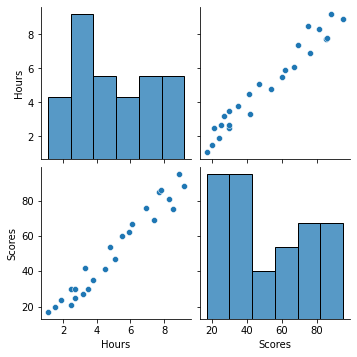

In [9]:
sns.pairplot(data)
plt.show()

<AxesSubplot:xlabel='Scores'>

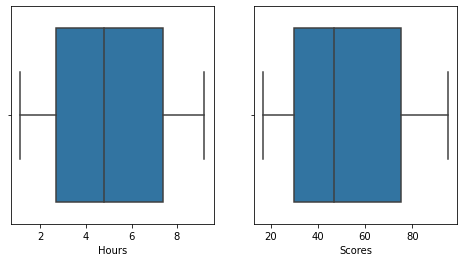

In [10]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(data.Hours)
plt.subplot(1,2,2)
sns.boxplot(data.Scores)

#### It Seems that there is no outlier in our dataset

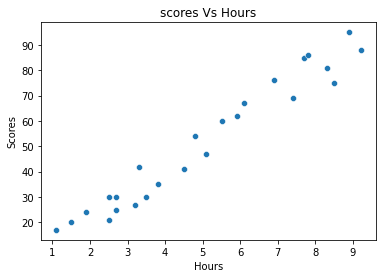

In [11]:
sns.scatterplot(data=data, x= "Hours", y="Scores")
plt.title("scores Vs Hours")
plt.show()

#### From the above two graphs we saw that both the variables are highly correlated

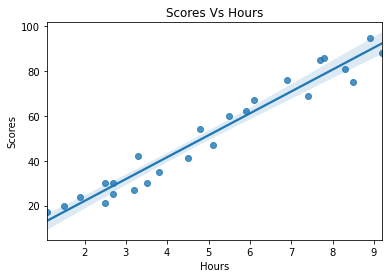

In [12]:
sns.regplot(data=data,x="Hours", y="Scores")
plt.title("Scores Vs Hours")
plt.show()

__from the above graph we could see that high corelation between "Scores and Hours"__

# Corelation Matrix

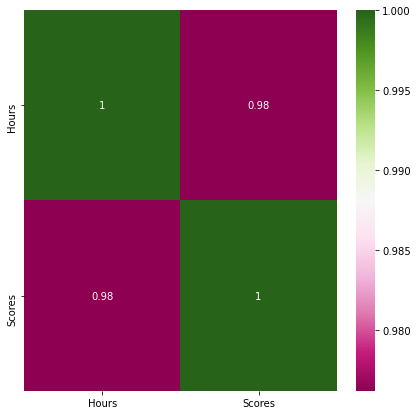

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap="PiYG")
plt.show()

### From the above heatmap we saw that Correlation is very between Scores and Hours

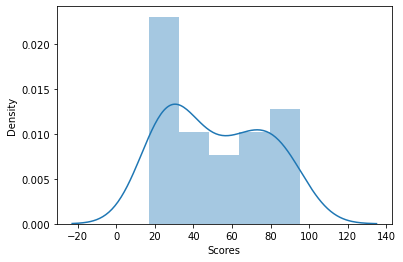

In [14]:
sns.distplot(data.Scores,bins=5);

### From the above graph we saw that the Scores data is normally distributed
So we now perform LINEAR REGRESSION on our data

# Step3: Linear Regression

### First split the data in X and y according to their dependent and independent nature of variable:
  - Score is depend on number of Hours you studied, So we put Score variable in y.
  - Hours is an independent variable, So it should be put in X.

In [15]:
X = data.iloc[ :, :-1].values
y = data.iloc[ :, 1].values

In [16]:
X.shape

(25, 1)

# Split the data into " Train and Test"

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [19]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [20]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [21]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [22]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

__After split the data into Train and Test,now we will do Train our algorithm__ 

# Step 4: Training Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train,y_train)
print("coef :",lnr.coef_)
print("intersept :",lnr.intercept_)

coef : [9.68207815]
intersept : 2.826892353899737


#### Ploting the regression line

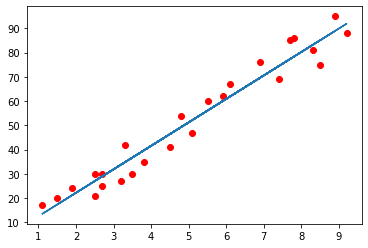

In [24]:
#plot the Regression Line
line = lnr.coef_*X+lnr.intercept_
#plotting for the test data
plt.scatter(X,y,c="r")
plt.plot(X,line);
plt.show;

### Checking the Accuracy score for both training as well as test dataset

In [25]:
print("Training Score ",lnr.score(X_train,y_train)*100)
print("Test Score", lnr.score(X_test,y_test)*100)

Training Score  94.91209376364415
Test Score 96.78055545167994


# Prediction on the Test Set

In [26]:
print("y_test :",y_test)
print("X_test :",X_test)

y_test : [81 30 21 76 62]
X_test : [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [27]:
y_pred = lnr.predict(X_test)
print("y_pred :",y_pred)

y_pred : [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [28]:
#compare actual Vs predict
dataframe = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
dataframe

,Actual,Predict
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### we are done with our model
let's test this model
- If a student study 9.25 hours a day:
    - What will be her/him score.

In [29]:
hours = 9.25
score =lnr.predict([[hours]])
score[0]

92.38611528261494

In [30]:
print("Number of study hours = ",hours)
print("Predictive score = ", score[0])

Number of study hours =  9.25
Predictive score =  92.38611528261494


# Final Step 6: Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [31]:
from sklearn import metrics

### Mean Absolute Error

In [32]:
print("Mean Absolute Error :" ,metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 3.9207511902099244


### Root Mean Square Error

In [33]:
print("Root Mean Squared Error :" , metrics.mean_squared_error(y_test,y_pred))

Root Mean Squared Error : 18.943211722315272


__Here MAE and R-Squared value is less,we can say that Model doing great linear model .__

# Conclusion

After Analysing the dataset we got Predicted score around 92 based on the number of study hours i.e., 9.25 hrs/day.